In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('DowAggregate.csv')

In [5]:
data.head()

,Unnamed: 0,DATE,Unnamed: 0.1,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,open,high,low,close,volume
0,0,2018-04-27,138714.904762,1.783493,1.553990,0.229502,94.595238,44.976190,2.526867,472.166667,116.281429,117.134048,115.172143,116.154762,1.405028e+07
1,1,2018-04-30,138716.571429,1.969362,1.608315,0.361047,91.023810,41.309524,2.245724,534.333333,116.808810,117.736667,115.181667,115.650714,1.474866e+07
2,2,2018-05-01,138718.238095,1.825524,1.631741,0.193783,182.619048,83.976190,1.961890,870.357143,115.314762,116.006190,113.607381,115.303810,1.382397e+07
3,3,2018-05-02,138719.904762,1.717275,1.727557,-0.010282,103.928571,46.404762,3.169200,496.642857,115.299524,116.093571,113.884286,114.412381,1.358242e+07
4,4,2018-05-03,138721.571429,1.780358,1.797388,-0.017030,72.642857,32.309524,2.466857,363.166667,113.917381,114.852381,112.275476,114.280238,1.247906e+07


In [6]:
data = data.drop(['Unnamed: 0.1', 'DATE'], axis = 1)

In [7]:
data = data.rename(columns = {'Unnamed: 0': 'Series'})

In [8]:
data.head()

,Series,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,open,high,low,close,volume
0,0,1.783493,1.553990,0.229502,94.595238,44.976190,2.526867,472.166667,116.281429,117.134048,115.172143,116.154762,1.405028e+07
1,1,1.969362,1.608315,0.361047,91.023810,41.309524,2.245724,534.333333,116.808810,117.736667,115.181667,115.650714,1.474866e+07
2,2,1.825524,1.631741,0.193783,182.619048,83.976190,1.961890,870.357143,115.314762,116.006190,113.607381,115.303810,1.382397e+07
3,3,1.717275,1.727557,-0.010282,103.928571,46.404762,3.169200,496.642857,115.299524,116.093571,113.884286,114.412381,1.358242e+07
4,4,1.780358,1.797388,-0.017030,72.642857,32.309524,2.466857,363.166667,113.917381,114.852381,112.275476,114.280238,1.247906e+07


In [9]:
X = data[['Series']]
y = data[['BULLISH_INTENSITY']]

Text(0, 0.5, 'Close Price')

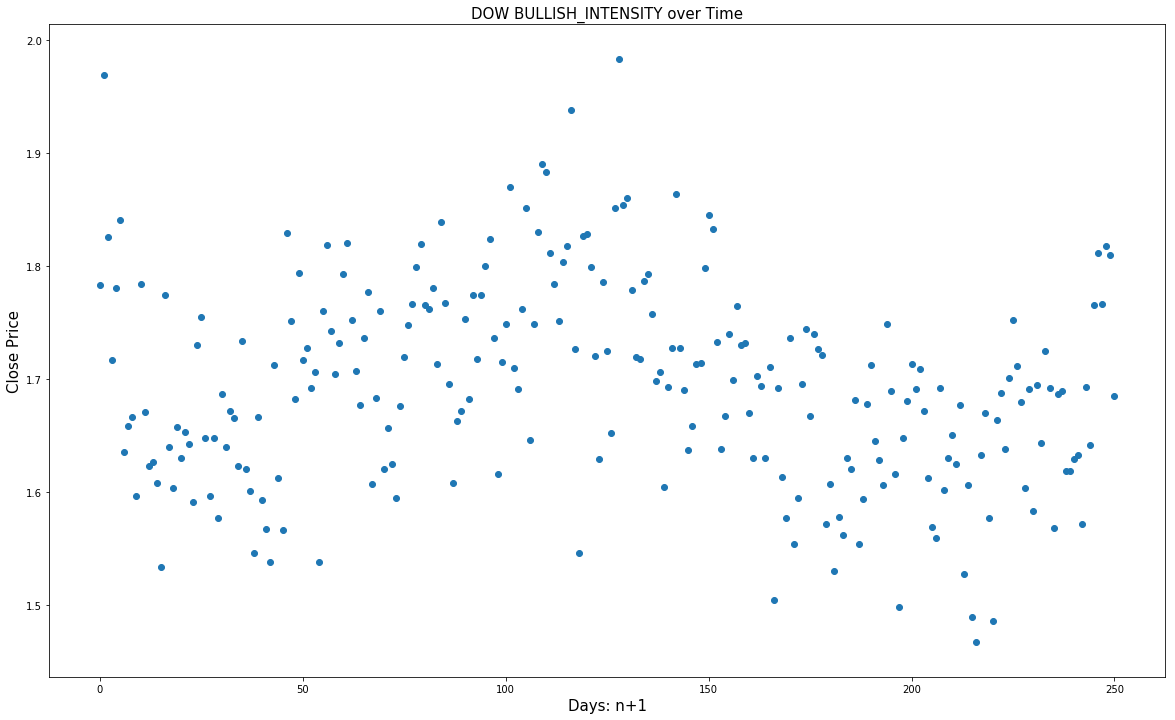

In [10]:
plt.figure(figsize = (20,12))
plt.scatter(X, y)
plt.title("DOW BULLISH_INTENSITY over Time", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_pred = lm.predict(X)

Text(0, 0.5, 'Close Price')

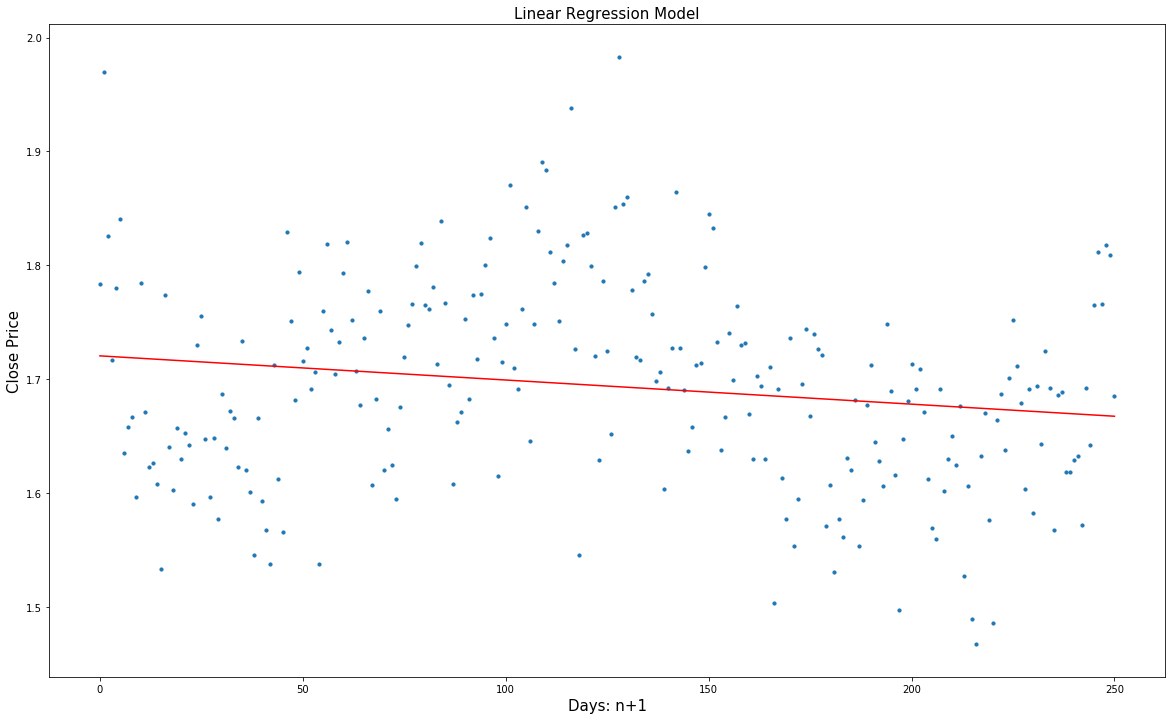

In [14]:
plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_pred, color = 'r')
plt.title("Linear Regression Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

In [ ]:
# generate a higher order ploynomial model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [46]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("RMSE-2nd: ", rmse)
print("R-Squared: ", r2)

RMSE-2nd:  0.08854824049912778
R-Squared-2nd:  0.029192566570724443


In [16]:
ploy2 = PolynomialFeatures(degree = 2)
x_poly2 = ploy2.fit_transform(X)

In [17]:
lm.fit(x_poly2, y)
y_poly2_pred = lm.predict(x_poly2)

In [18]:
rmse = np.sqrt(mean_squared_error(y,y_poly2_pred))
r2 = r2_score(y,y_poly2_pred)
print("RMSE-2nd: ", rmse)
print("R-Squared-2nd: ", r2)

RMSE-2nd:  0.0857062257182648
R-Squared-2nd:  0.0905099298661961


RMSE-2nd:  0.0857062257182648
R-Squared-2nd:  0.0905099298661961


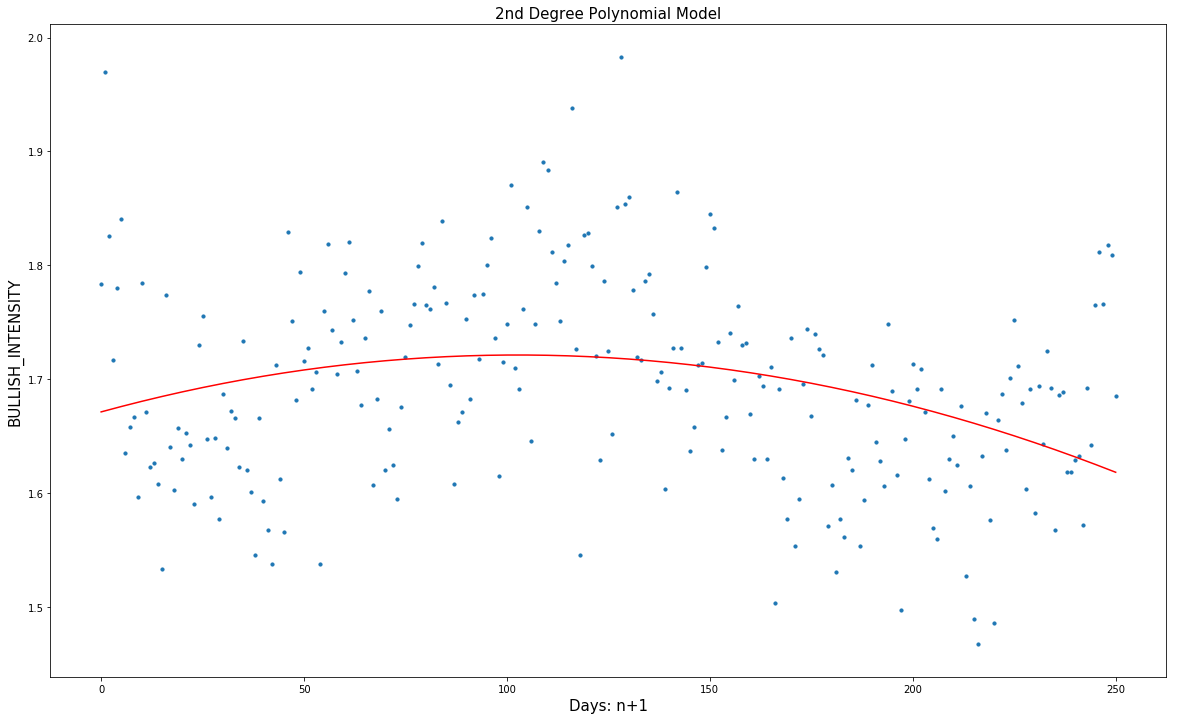

In [45]:
plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly2_pred, color = 'r')
plt.title("2nd Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_2 = np.sqrt(mean_squared_error(y,y_poly2_pred))
r2_2 = r2_score(y,y_poly2_pred)
print("RMSE-2nd: ", rmse_2)
print("R-Squared-2nd: ", r2_2)

RMSE-3rd:  0.08442205960691217
R-Squared-3rd:  0.11756015916736051


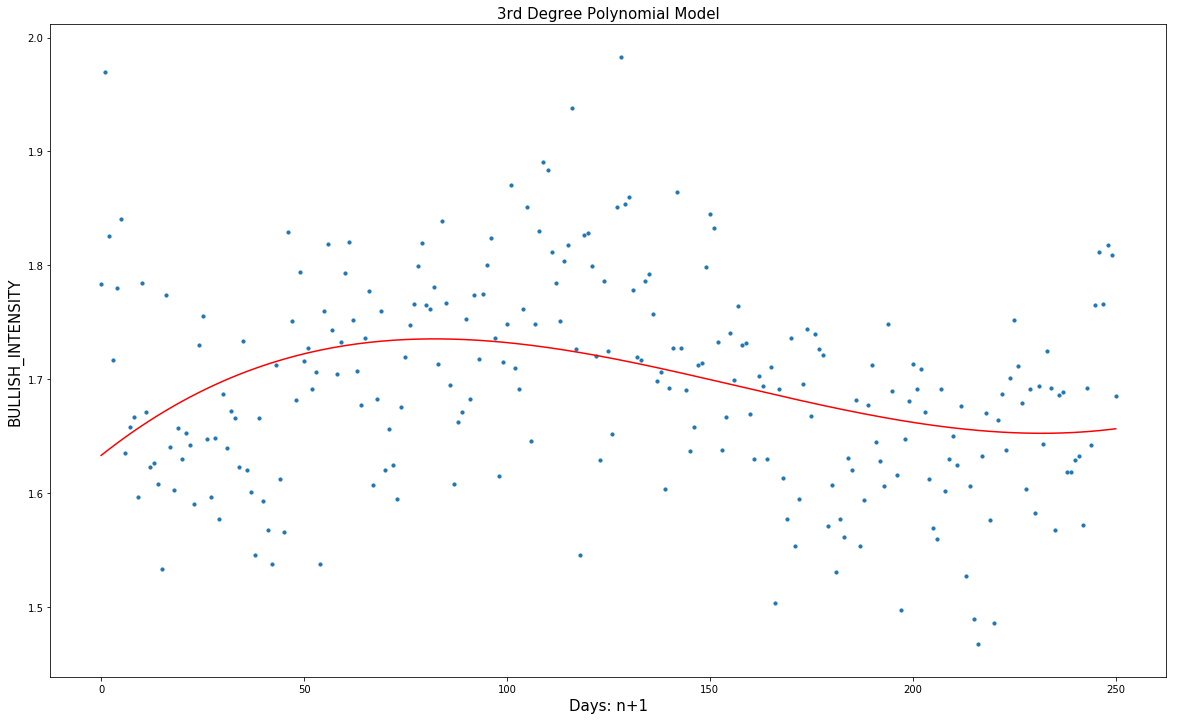

In [31]:
ploy3 = PolynomialFeatures(degree = 3)
x_poly3 = ploy3.fit_transform(X)

lm.fit(x_poly3, y)
y_poly3_pred = lm.predict(x_poly3)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly3_pred, color = 'r')
plt.title("3rd Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_3 = np.sqrt(mean_squared_error(y,y_poly3_pred))
r2_3 = r2_score(y,y_poly3_pred)
print("RMSE-3rd: ", rmse_3)
print("R-Squared-3rd: ", r2_3)

RMSE-4th:  0.07424489212975578
R-Squared-4th:  0.31749414351257144


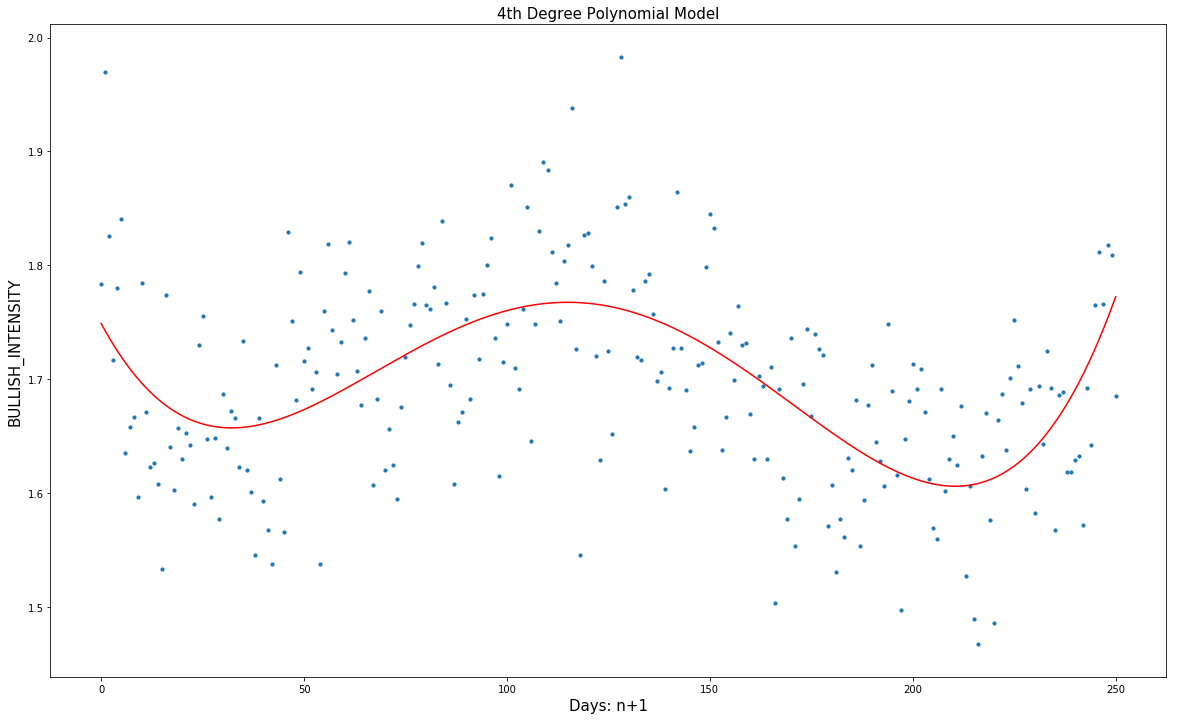

In [40]:
ploy4 = PolynomialFeatures(degree = 4)
x_poly4 = ploy4.fit_transform(X)

lm.fit(x_poly4, y)
y_poly4_pred = lm.predict(x_poly4)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly4_pred, color = 'r')
plt.title("4th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_4 = np.sqrt(mean_squared_error(y,y_poly4_pred))
r2_4 = r2_score(y,y_poly4_pred)
print("RMSE-4th: ", rmse_4)
print("R-Squared-4th: ", r2_4)

RMSE-5th:  0.073433654027701
R-Squared-5th:  0.33232748413575175


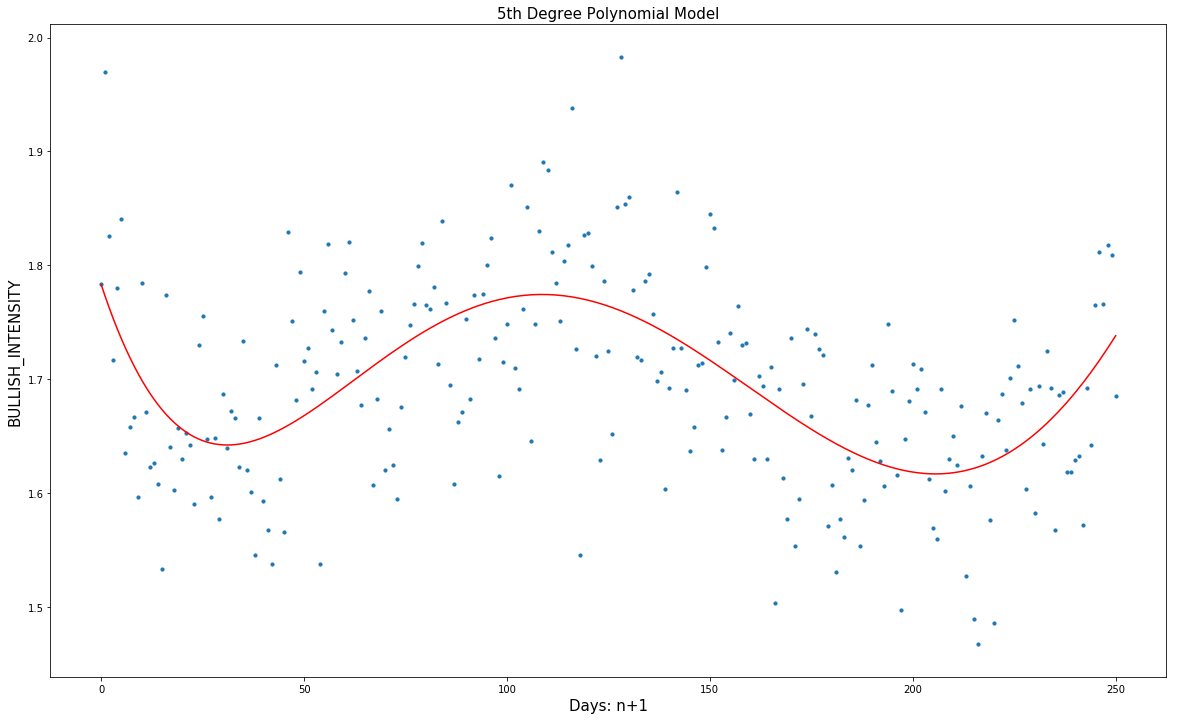

In [41]:
ploy5 = PolynomialFeatures(degree = 5)
x_poly5 = ploy5.fit_transform(X)

lm.fit(x_poly5, y)
y_poly5_pred = lm.predict(x_poly5)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly5_pred, color = 'r')
plt.title("5th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_5 = np.sqrt(mean_squared_error(y,y_poly5_pred))
r2_5 = r2_score(y,y_poly5_pred)
print("RMSE-5th: ", rmse_5)
print("R-Squared-5th: ", r2_5)

RMSE-6th:  0.07319490019685064
R-Squared-6th:  0.3366620152243678


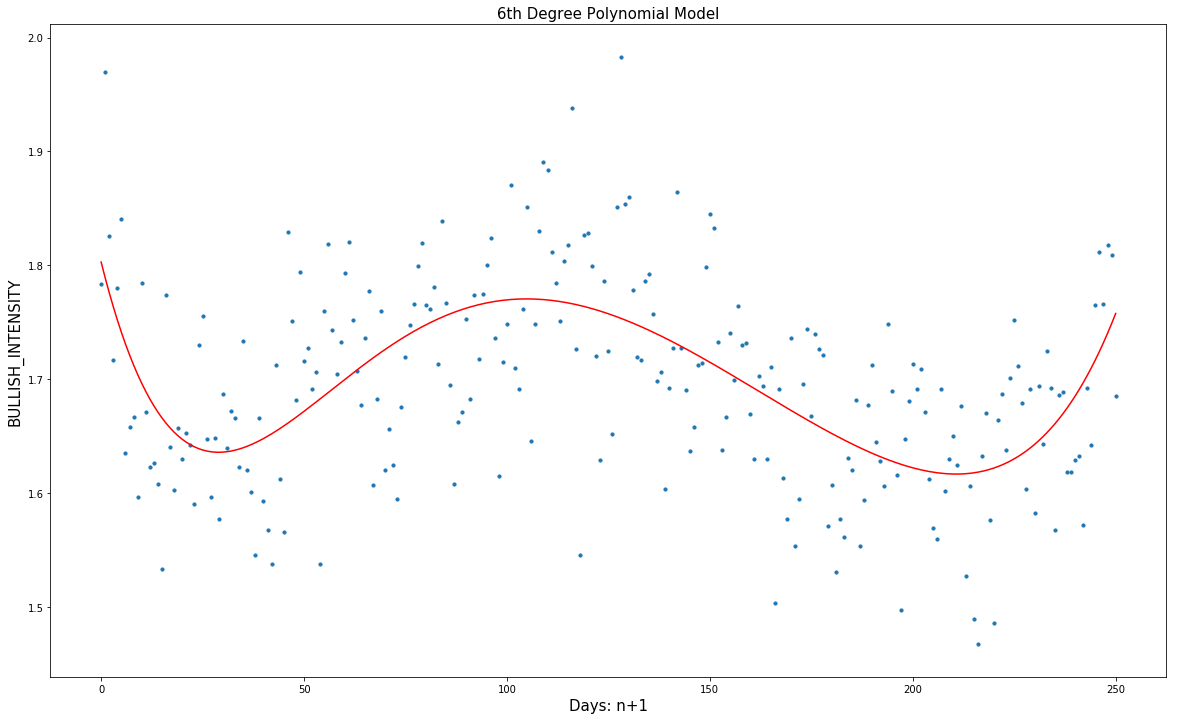

In [42]:
ploy6 = PolynomialFeatures(degree = 6)
x_poly6 = ploy6.fit_transform(X)

lm.fit(x_poly6, y)
y_poly6_pred = lm.predict(x_poly6)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly6_pred, color = 'r')
plt.title("6th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_6 = np.sqrt(mean_squared_error(y,y_poly6_pred))
r2_6 = r2_score(y,y_poly6_pred)
print("RMSE-6th: ", rmse_6)
print("R-Squared-6th: ", r2_6)

RMSE-7th:  0.0748995614071128
R-Squared-7th:  0.30540481194268754


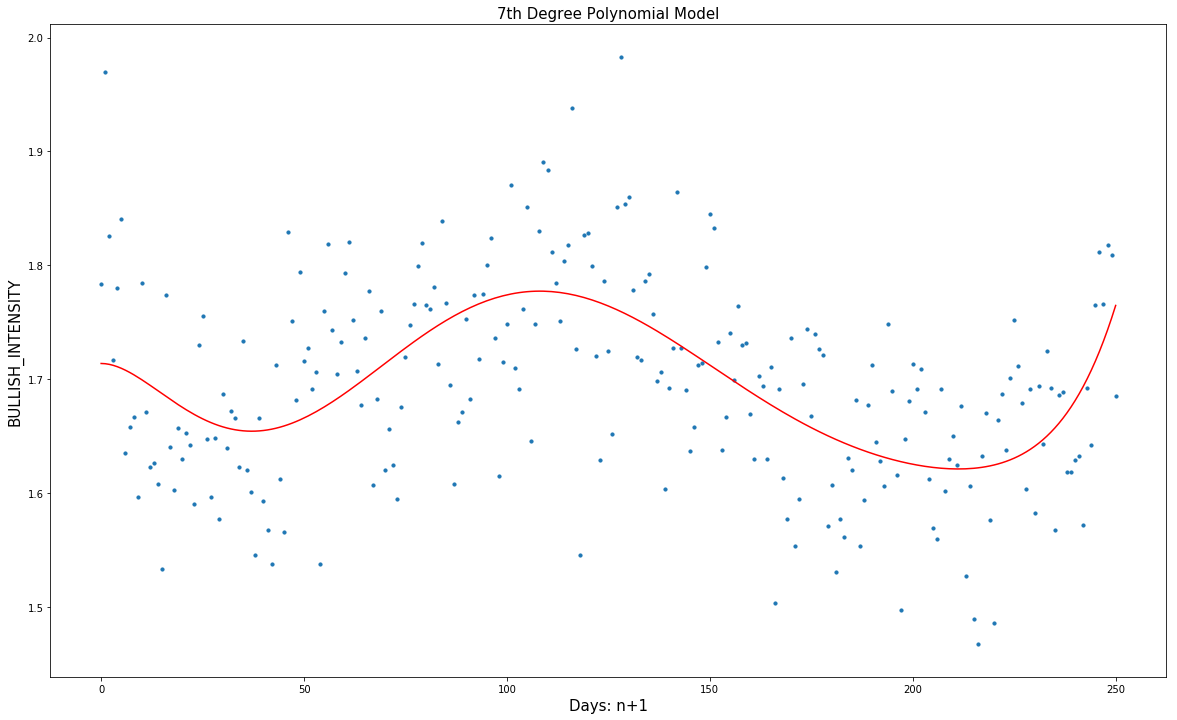

In [35]:
ploy7 = PolynomialFeatures(degree = 7)
x_poly7 = ploy7.fit_transform(X)

lm.fit(x_poly7, y)
y_poly7_pred = lm.predict(x_poly7)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly7_pred, color = 'r')
plt.title("7th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_7 = np.sqrt(mean_squared_error(y,y_poly7_pred))
r2_7 = r2_score(y,y_poly7_pred)
print("RMSE-7th: ", rmse_7)
print("R-Squared-7th: ", r2_7)

RMSE-8th:  0.07556388657659521
R-Squared-8th:  0.293028679795585


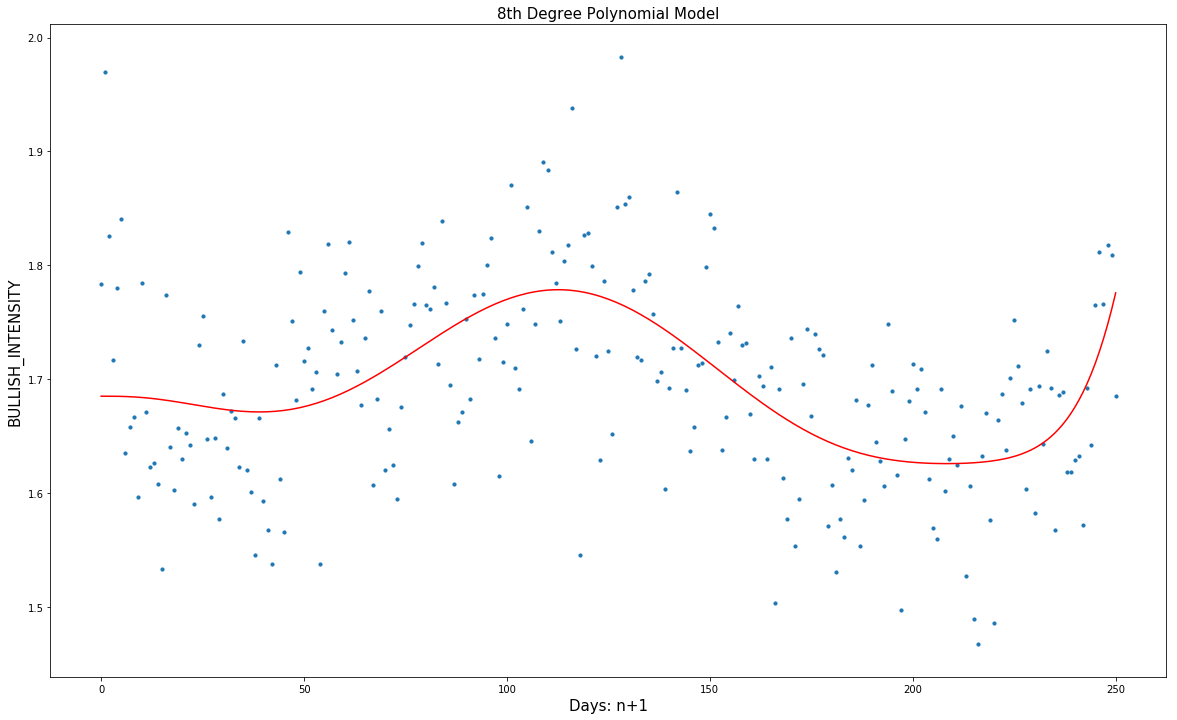

In [36]:
ploy8 = PolynomialFeatures(degree = 8)
x_poly8 = ploy8.fit_transform(X)

lm.fit(x_poly8, y)
y_poly8_pred = lm.predict(x_poly8)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly8_pred, color = 'r')
plt.title("8th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_8 = np.sqrt(mean_squared_error(y,y_poly8_pred))
r2_8 = r2_score(y,y_poly8_pred)
print("RMSE-8th: ", rmse_8)
print("R-Squared-8th: ", r2_8)

RMSE-9th:  0.07568119200662968
R-Squared-9th:  0.29083197049393694


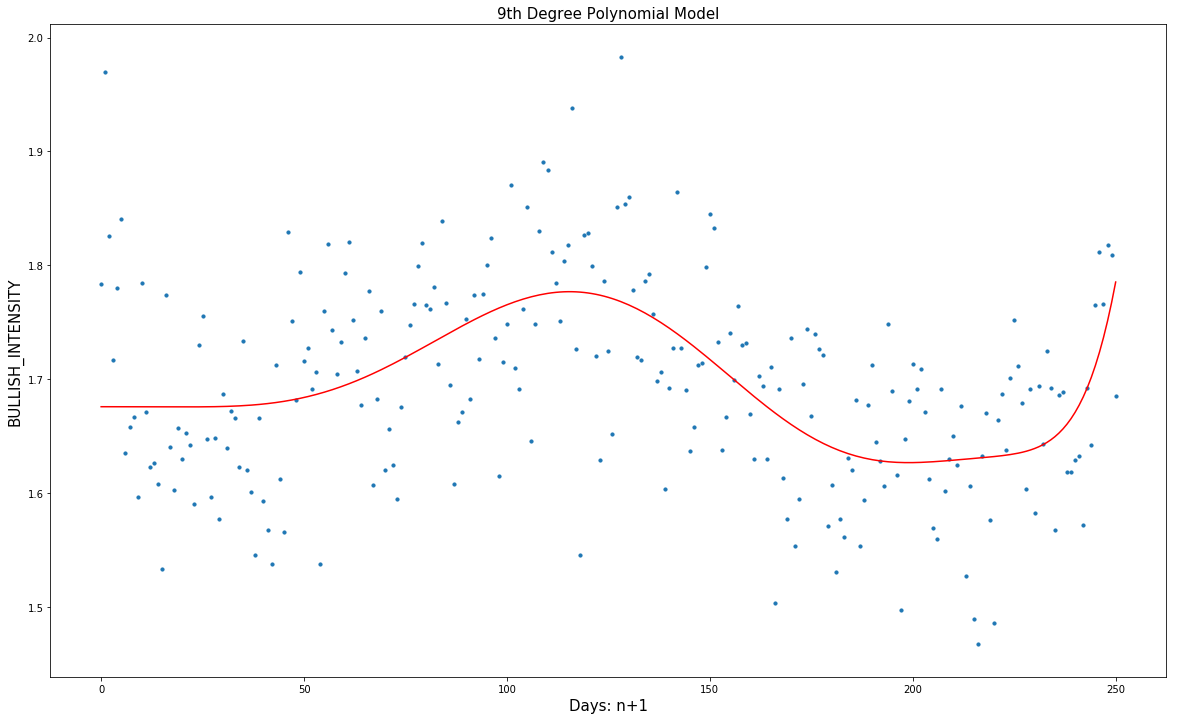

In [44]:
ploy9 = PolynomialFeatures(degree = 9)
x_poly9 = ploy9.fit_transform(X)

lm.fit(x_poly9, y)
y_poly9_pred = lm.predict(x_poly9)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly9_pred, color = 'r')
plt.title("9th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_9 = np.sqrt(mean_squared_error(y,y_poly9_pred))
r2_9 = r2_score(y,y_poly9_pred)
print("RMSE-9th: ", rmse_9)
print("R-Squared-9th: ", r2_9)

RMSE-10th:  0.07569144144473716
R-Squared-10th:  0.2906398734663449


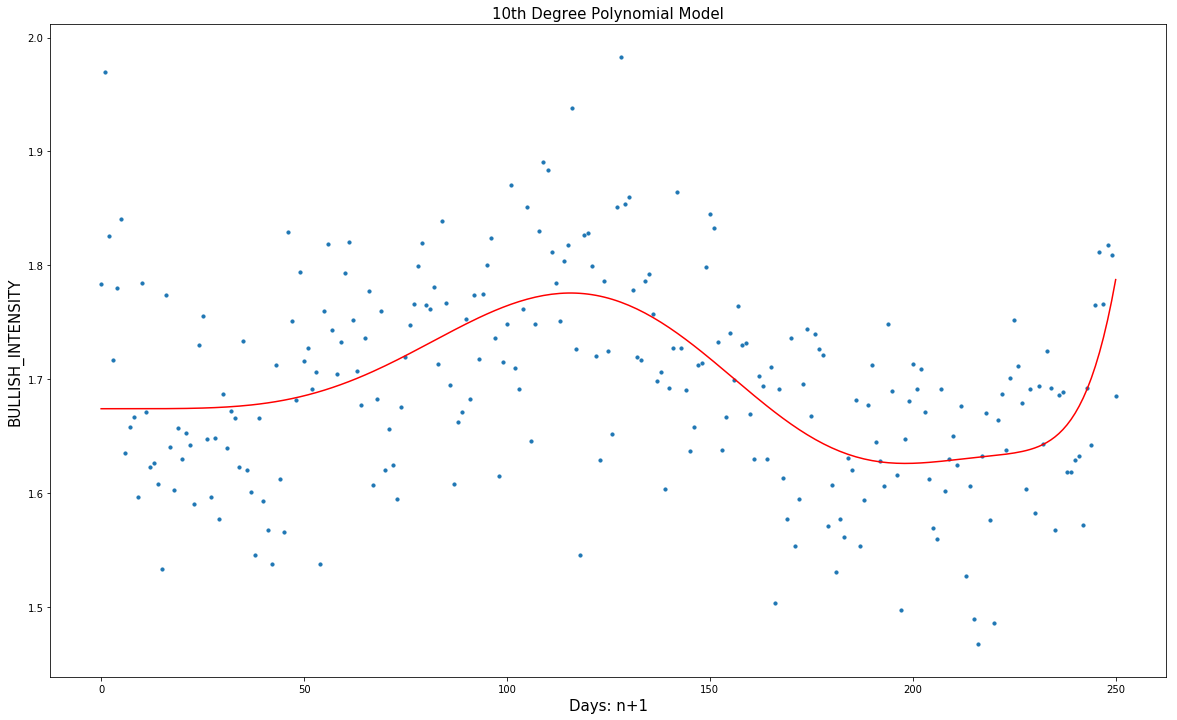

In [39]:
ploy10 = PolynomialFeatures(degree = 10)
x_poly10 = ploy10.fit_transform(X)

lm.fit(x_poly10, y)
y_poly10_pred = lm.predict(x_poly10)

plt.figure(figsize = (20,12))
plt.scatter(X, y, s = 10)
plt.plot(X, y_poly10_pred, color = 'r')
plt.title("10th Degree Polynomial Model", fontsize = 15)
plt.xlabel("Days: n+1", fontsize = 15)
plt.ylabel("BULLISH_INTENSITY", fontsize = 15)

rmse_10 = np.sqrt(mean_squared_error(y,y_poly10_pred))
r2_10 = r2_score(y,y_poly10_pred)
print("RMSE-10th: ", rmse_10)
print("R-Squared-10th: ", r2_10)